# 📊  Data Cleaning & Basic EDA




#### Missing values Handel:-
i) In the accounts table, the subsidiary_of column has about 18% null values. However, this column is not very important for our analysis, so we decided to keep or drop it depending on the specific analysis needs.

ii) In the sales_pipeline table, the following columns have missing values:

account – 16.9%

engage_date – 6%

close_date – 24%

close_value – 24%

For analysis purposes, I replaced the NaN values in these columns with ‘Unassigned’. We cannot drop these rows because the data is important for insights related to Engaging and Prospecting stages.

We apply this replacement only to categorical or text columns, not to numerical columns, and only when specific insights require it.

#### Outlier handel:-
iii) IN accounts table -revenue and employees have right skwed data and IN sales_pipeline close_value of won deals have some outliers 
but iThey reflect genuine success and helps to give usful insights so we dont remove them .

#### Invalid Data Handel:-
i) corrected data type of engage_date and close_date of string to datetime for future time related insights



📊 Key Insights

i) The top sales agent by close value is Elease Gluk, with a total close value of 184,632.0, which is the highest among all agents.

ii) Our deal win ratio is approximately 49% of the total deals.

iii) The top five sectors with revenue greater than the overall average are:
Retail, Technology, Software, Telecommunication, and Finance.
The Software sector has the maximum revenue among these top sectors.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(f'CRM_Data/accounts.csv')
display(df.head(10)  )
display(df.describe(include='all'))

df.info()



,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN
5,Blackzim,retail,2009,497.11,1588,United States,NaN
6,Bluth Company,technolgy,1993,1242.32,3027,United States,Acme Corporation
7,Bubba Gump,software,2002,987.39,2253,United States,NaN
8,Cancity,retail,2001,718.62,2448,United States,NaN
9,Cheers,entertainment,1993,4269.90,6472,United States,Massive Dynamic


,account,sector,year_established,revenue,employees,office_location,subsidiary_of
count,85,85,85.000000,85.000000,85.000000,85,15
unique,85,10,NaN,NaN,NaN,15,7
top,Acme Corporation,retail,NaN,NaN,NaN,United States,Acme Corporation
freq,1,17,NaN,NaN,NaN,71,4
mean,NaN,NaN,1996.105882,1994.632941,4660.823529,NaN,NaN
std,NaN,NaN,8.865427,2169.491436,5715.601198,NaN,NaN
min,NaN,NaN,1979.000000,4.540000,9.000000,NaN,NaN
25%,NaN,NaN,1989.000000,497.110000,1179.000000,NaN,NaN
50%,NaN,NaN,1996.000000,1223.720000,2769.000000,NaN,NaN
75%,NaN,NaN,2002.000000,2741.370000,5595.000000,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB


In [3]:
df[df["revenue"]>2741] #outlier but genuin

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
9,Cheers,entertainment,1993,4269.90,6472,United States,Massive Dynamic
18,Dontechi,software,1982,4618.00,10083,United States,NaN
20,Fasehatice,retail,1990,4968.91,7523,United States,NaN
24,Funholding,finance,1991,2819.50,7227,United States,Golddex
25,Ganjaflex,retail,1995,5158.71,17479,Japan,NaN
31,Goodsilron,marketing,2000,2952.73,5107,United States,NaN
35,Hottechi,technolgy,1997,8170.38,16499,Korea,NaN
36,Initech,telecommunications,1994,6395.05,20275,United States,NaN
38,Isdom,medical,2002,3178.24,4540,United States,NaN
41,Kan-code,software,1982,11698.03,34288,United States,NaN


In [4]:
df = df.drop(columns=['subsidiary_of'])

In [5]:
df = pd.read_csv(f'CRM_Data/data_dictionary.csv')
display(df.head(10))
display(df.describe(include='all'))

df.info()



,Table,Field,Description
0,accounts,account,Company name
1,accounts,sector,Industry
2,accounts,year_established,Year Established
3,accounts,revenue,Annual revenue (in millions of USD)
4,accounts,employees,Number of employees
5,accounts,office_location,Headquarters
6,accounts,subsidiary_of,Parent company
7,products,product,Product name
8,products,series,Product series
9,products,sales_price,Suggested retail price


,Table,Field,Description
count,21,21,21
unique,4,18,19
top,sales_pipeline,account,Company name
freq,8,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        21 non-null     object
 1   Field        21 non-null     object
 2   Description  21 non-null     object
dtypes: object(3)
memory usage: 636.0+ bytes


In [6]:
df = pd.read_csv(f'CRM_Data/products.csv')
display(df.head(10)  )
display(df.describe(include='all'))

df.info()



,product,series,sales_price
0,GTX Basic,GTX,550
1,GTX Pro,GTX,4821
2,MG Special,MG,55
3,MG Advanced,MG,3393
4,GTX Plus Pro,GTX,5482
5,GTX Plus Basic,GTX,1096
6,GTK 500,GTK,26768


,product,series,sales_price
count,7,7,7.000000
unique,7,3,NaN
top,GTX Basic,GTX,NaN
freq,1,4,NaN
mean,NaN,NaN,6023.571429
std,NaN,NaN,9388.428070
min,NaN,NaN,55.000000
25%,NaN,NaN,823.000000
50%,NaN,NaN,3393.000000
75%,NaN,NaN,5151.500000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product      7 non-null      object
 1   series       7 non-null      object
 2   sales_price  7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 300.0+ bytes


In [7]:
df = pd.read_csv(f'CRM_Data/sales_teams.csv')
display(df.head(10)  )
display(df.describe(include='all'))

df.info()



,sales_agent,manager,regional_office
0,Anna Snelling,Dustin Brinkmann,Central
1,Cecily Lampkin,Dustin Brinkmann,Central
2,Versie Hillebrand,Dustin Brinkmann,Central
3,Lajuana Vencill,Dustin Brinkmann,Central
4,Moses Frase,Dustin Brinkmann,Central
5,Jonathan Berthelot,Melvin Marxen,Central
6,Marty Freudenburg,Melvin Marxen,Central
7,Gladys Colclough,Melvin Marxen,Central
8,Niesha Huffines,Melvin Marxen,Central
9,Darcel Schlecht,Melvin Marxen,Central


,sales_agent,manager,regional_office
count,35,35,35
unique,35,6,3
top,Anna Snelling,Melvin Marxen,East
freq,1,6,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sales_agent      35 non-null     object
 1   manager          35 non-null     object
 2   regional_office  35 non-null     object
dtypes: object(3)
memory usage: 972.0+ bytes


# Missing Value Handeling

### We Dont Drop any missing nan values in sales_pipeline because they are important so just rename them .



In [8]:
df = pd.read_csv(f'CRM_Data/sales_pipeline.csv')
display(df.head(10)  )
display(df.describe(include='all'))

df.info()


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,10/20/2016,3/1/2017,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,10/25/2016,3/11/2017,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,10/25/2016,3/7/2017,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,10/25/2016,3/9/2017,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,10/25/2016,3/2/2017,517.0
5,ZNBS69V1,Anna Snelling,MG Special,Ron-tech,Won,10/29/2016,3/1/2017,49.0
6,9ME3374G,Vicki Laflamme,MG Special,J-Texon,Won,10/30/2016,3/2/2017,57.0
7,7GN8Q4LL,Markita Hansen,GTX Basic,Cheers,Won,11/1/2016,3/7/2017,601.0
8,OLK9LKZB,Niesha Huffines,GTX Plus Basic,Zumgoity,Won,11/1/2016,3/3/2017,1026.0
9,HAXMC4IX,James Ascencio,MG Advanced,NaN,Engaging,11/3/2016,NaN,NaN


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
count,8800,8800,8800,7375,8800,8300,6711,6711.000000
unique,8800,30,7,85,4,421,306,NaN
top,1C1I7A6R,Darcel Schlecht,GTX Basic,Hottechi,Won,7/22/2017,5/22/2017,NaN
freq,1,747,1866,200,4238,66,41,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490.915512
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2320.670773
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,472.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3225.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         7375 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8300 non-null   object 
 6   close_date      6711 non-null   object 
 7   close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


#### Datatype Change

In [9]:
df["engage_date"] = pd.to_datetime(df["engage_date"], format="%m/%d/%Y")
df["close_date"] = pd.to_datetime(df["close_date"], format="%m/%d/%Y")

### Treat with 'Unassigned'

In [10]:

# df['account'] = df['account'].fillna('Unassigned')
# df['engage_date'] = df['engage_date'].fillna('Unassigned')


In [11]:
# df['close_date'] = df['close_date'].fillna('Unassigned')
# df['close_value'] = df['close_value'].fillna('Unassigned')

right now we dont assing string value like 'Unassigned' inplace of nan values  we use when we want for insights

# Outlier Handling

In [12]:
df.describe()





,engage_date,close_date,close_value
count,8300,6711,6711.000000
mean,2017-06-14 08:35:06.216867584,2017-08-01 03:32:25.641484032,1490.915512
min,2016-10-20 00:00:00,2017-03-01 00:00:00,0.000000
25%,2017-04-04 00:00:00,2017-05-18 00:00:00,0.000000
50%,2017-06-24 00:00:00,2017-08-02 00:00:00,472.000000
75%,2017-08-27 00:00:00,2017-10-18 00:00:00,3225.000000
max,2017-12-27 00:00:00,2017-12-31 00:00:00,30288.000000
std,NaN,NaN,2320.670773


In [13]:
df['close_value'].isnull().sum()

2089

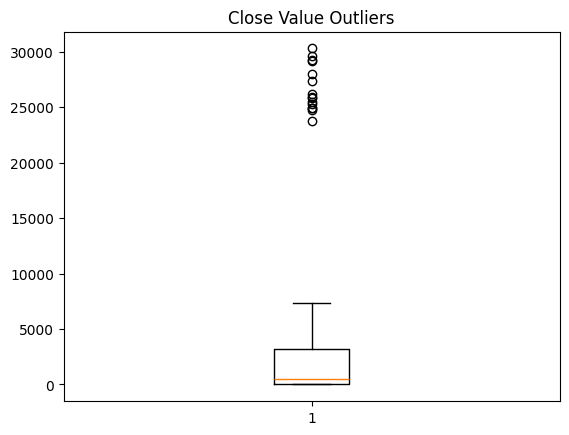

In [14]:
plt.boxplot(df['close_value'].dropna())
plt.title('Close Value Outliers')
plt.show()

In [15]:
Q1 = df['close_value'].quantile(0.25)
Q3 = df['close_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['close_value'] < lower_bound) | (df['close_value'] > upper_bound)]
print("Outlier count:", outliers.shape[0])


Outlier count: 15


In [16]:
df[(df['close_value'] < lower_bound) | (df['close_value'] > upper_bound)]


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
59,XUSUEAV7,Elease Gluck,GTK 500,Zoomit,Won,2016-11-20,2017-03-09,25897.0
677,60UOBOEM,Rosalina Dieter,GTK 500,Groovestreet,Won,2017-02-01,2017-06-07,30288.0
1156,4V0S4BA3,Markita Hansen,GTK 500,Goodsilron,Won,2017-02-27,2017-06-27,29617.0
1825,JXUXBANJ,Rosalina Dieter,GTK 500,Y-corporation,Won,2017-03-26,2017-04-05,25288.0
2559,OUIK8VX3,Elease Gluck,GTK 500,Lexiqvolax,Won,2017-04-19,2017-04-20,23746.0
2586,K0T5LJ3E,Elease Gluck,GTK 500,Plexzap,Won,2017-04-20,2017-06-28,24949.0
2808,731TOWDY,Elease Gluck,GTK 500,Labdrill,Won,2017-04-28,2017-06-18,27385.0
3352,TB27K4GC,Markita Hansen,GTK 500,Finjob,Won,2017-05-22,2017-08-14,24745.0
3495,83JP1K4E,Rosalina Dieter,GTK 500,Rantouch,Won,2017-05-28,2017-08-28,24899.0
3522,4X3H9YD5,Rosalina Dieter,GTK 500,Kan-code,Won,2017-05-29,2017-08-29,25791.0


## we dont remove these geniun outliers & using these outliers i found intresting insight 

# Insights 

In [17]:
df = pd.read_csv(f'CRM_Data/sales_pipeline.csv')
display(df.head(10))
display(df.describe())
df.info()



,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,10/20/2016,3/1/2017,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,10/25/2016,3/11/2017,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,10/25/2016,3/7/2017,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,10/25/2016,3/9/2017,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,10/25/2016,3/2/2017,517.0
5,ZNBS69V1,Anna Snelling,MG Special,Ron-tech,Won,10/29/2016,3/1/2017,49.0
6,9ME3374G,Vicki Laflamme,MG Special,J-Texon,Won,10/30/2016,3/2/2017,57.0
7,7GN8Q4LL,Markita Hansen,GTX Basic,Cheers,Won,11/1/2016,3/7/2017,601.0
8,OLK9LKZB,Niesha Huffines,GTX Plus Basic,Zumgoity,Won,11/1/2016,3/3/2017,1026.0
9,HAXMC4IX,James Ascencio,MG Advanced,NaN,Engaging,11/3/2016,NaN,NaN


,close_value
count,6711.000000
mean,1490.915512
std,2320.670773
min,0.000000
25%,0.000000
50%,472.000000
75%,3225.000000
max,30288.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         7375 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8300 non-null   object 
 6   close_date      6711 non-null   object 
 7   close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


In [18]:
new_df = df[(df['close_value'] < lower_bound) | (df['close_value'] > upper_bound)]


In [19]:
new_df.groupby("sales_agent")["close_value"].count()


sales_agent
Elease Gluck       7
Markita Hansen     3
Rosalina Dieter    5
Name: close_value, dtype: int64

In [20]:
df.groupby("deal_stage")["close_value"].sum()


deal_stage
Engaging              0.0
Lost                  0.0
Prospecting           0.0
Won            10005534.0
Name: close_value, dtype: float64

In [21]:
new_df[new_df['sales_agent']== 'Elease Gluck']['close_value'].sum()

184632.0

In [22]:
new_df.groupby("sales_agent")["close_value"].sum()


sales_agent
Elease Gluck       184632.0
Markita Hansen      83528.0
Rosalina Dieter    132452.0
Name: close_value, dtype: float64

### this is the top sales agent by close value,  
no.1  sales agent is  **Elease Gluk** who give total close value of **184632.0** which is of total 
**1.845%** of close value of the **Won deals = 10005534.0** of whole company 

In [23]:
df.groupby(df["deal_stage"]).count()

,opportunity_id,sales_agent,product,account,engage_date,close_date,close_value
deal_stage,,,,,,,
Engaging,1589,1589,1589,501,1589,0,0
Lost,2473,2473,2473,2473,2473,2473,2473
Prospecting,500,500,500,163,0,0,0
Won,4238,4238,4238,4238,4238,4238,4238


In [24]:
df["deal_stage"].value_counts()

deal_stage
Won            4238
Lost           2473
Engaging       1589
Prospecting     500
Name: count, dtype: int64

### ii) Our deal win ratio is approximately **49%** of the total deals.

In [25]:
df = pd.read_csv(f'CRM_Data/accounts.csv')
df.head()


,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN


In [26]:
df['revenue'].max()

11698.03

<Axes: xlabel='employees', ylabel='Count'>

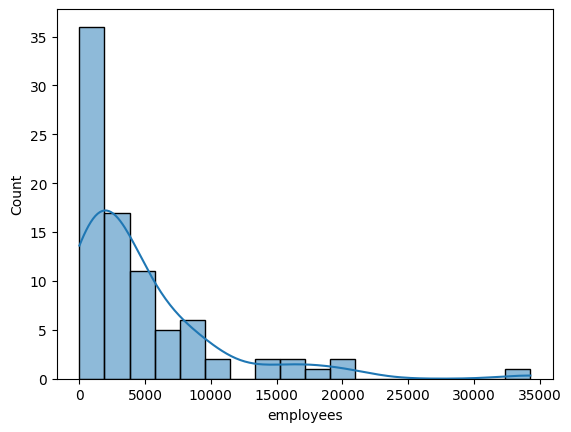

In [27]:
sns.histplot(df["employees"],kde=True)

In [28]:
df[df['employees']>11000]

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
25,Ganjaflex,retail,1995,5158.71,17479,Japan,NaN
35,Hottechi,technolgy,1997,8170.38,16499,Korea,NaN
36,Initech,telecommunications,1994,6395.05,20275,United States,NaN
41,Kan-code,software,1982,11698.03,34288,United States,NaN
43,Konex,technolgy,1980,7708.38,13756,United States,NaN
60,Scotfind,software,1996,6354.87,16780,United States,Bubba Gump
76,Xx-holding,finance,1993,7537.24,20293,United States,NaN
83,Zotware,software,1979,4478.47,13809,United States,NaN


<Axes: xlabel='revenue', ylabel='Count'>

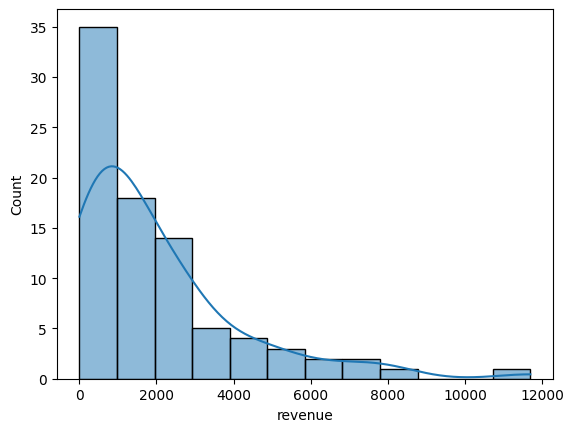

In [29]:
sns.histplot(df["revenue"], kde = True)

#### iii) reatil,technology,software,telecommunication,finance thse are the top sectors where revenue is > other sectors 
and top sector is software based on revenue